##  I have all the stock prize data downloaded from kaggle and then I filtered out the required 3 months stock price data for Apple, Microsoft, Netflix and Google. So i can use the other dataset in the future.
    

# 📈 Stock Market Analysis (Data Analyst Project)

## 1. Project Overview
## 2. Business Objective
## 3. Dataset Description
## 4. Importing Required Libraries
## 5. Data Loading


### 1.Project Overview
This project analyzes historical stock price data to understand price trends, volatility, and relationships between major stocks.The analysis focuses on comparative performance and statistical patterns in the stock market.


### 2. Business Objective
The objective of this project is to analyze and compare stock price movements of major companies, identify trends, compute moving averages and volatility, and study correlations between stock prices.

### 3.Dataset Description
The dataset contains historical daily stock price data for multiple companies and ETFs. Each stock file includes Date, Open, High, Low, Close, Adjusted Close, and Volume.

Additionally, a metadata file provides information about valid symbols.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [3]:
meta_df = pd.read_csv("data/symbols_valid_meta.csv")
meta_df.head()


,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


In [5]:
# we are starting with only one stock (apple)
aapl_df = pd.read_csv("data/stocks/AAPL.csv")
aapl_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [7]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [8]:
aapl_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03
mean,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07
std,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07
min,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05
25%,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07
50%,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07
75%,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08
max,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09


In [12]:
# converting it to pandas datetime
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df = aapl_df.sort_values('Date')

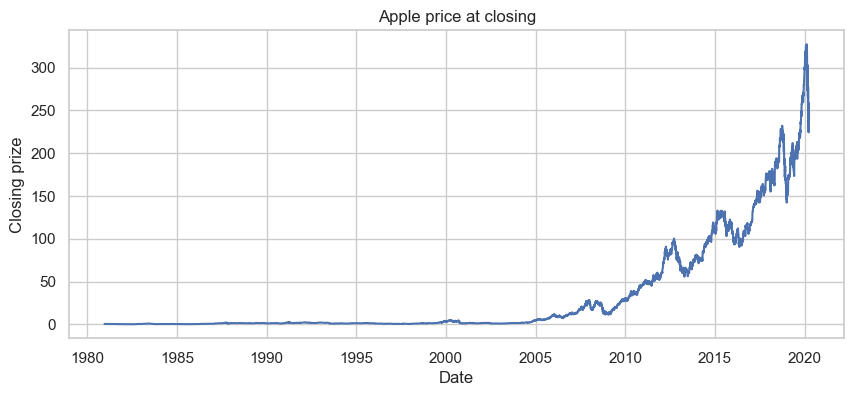

In [15]:
#validation step
plt.figure(figsize=(10,4))
plt.plot(aapl_df["Date"],aapl_df["Close"])
plt.title("Apple price at closing")
plt.xlabel("Date")
plt.ylabel("Closing prize")
plt.show()

In [16]:
aapl_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500
9908,2020-04-01,246.500000,248.720001,239.130005,240.910004,240.910004,43956200


 ### 4.⚠️ Note on Data Source Update (i saw that the data available was only until april 2020 so I will be using the data from API)

Initially, CSV files from Kaggle were explored for understanding the dataset structure. However, the final analysis uses **live historical data fetched programmatically using the Yahoo Finance API (yfinance)**.

This approach ensures up-to-date data, reproducibility, and betteralignment with real-world data analysis workflows.


In [17]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/127.1 kB ? eta -:--:--
   ------------------- -------------------- 61.4/127.1 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 127.1/127.1 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.6 MB 4.1 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/1.6 MB 2.3 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.6 MB 2.0 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.6 MB 2.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.6 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.6 MB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.6 MB 1.8 MB/s eta

In [32]:
import yfinance as yf
ticker = yf.Ticker("AAPL")
historical_data = ticker.history(period="1mo") 
historical_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2026-01-12 00:00:00-05:00,259.160004,261.299988,256.799988,260.250000,45263800,0.0,0.0
2026-01-13 00:00:00-05:00,258.720001,261.809998,258.390015,261.049988,45730800,0.0,0.0
2026-01-14 00:00:00-05:00,259.489990,261.820007,256.709991,259.959991,40019400,0.0,0.0
2026-01-15 00:00:00-05:00,260.649994,261.040009,257.049988,258.209991,39388600,0.0,0.0
2026-01-16 00:00:00-05:00,257.899994,258.899994,254.929993,255.529999,72018600,0.0,0.0


## Data Source: Finance API (Yahoo Finance)

Instead of using a static dataset, this project retrieves historical stock price data programmatically using the Yahoo Finance API via the `yfinance` Python library.

### Why Finance API?
- Ensures access to the **most recent available data**
- Eliminates dependency on outdated static files
- Reflects **real-world data analyst workflows**
- Enables reproducibility by fetching data dynamically

Adjusted prices are used to remove the effects of dividends and stock-splits, ensuring consistent and comparable price trends across time

### 5. Download, Combine and Clean the data set

In [33]:
# I am using 1 year data and the last end date as of what i checked is 16th jan 2026
stock_symbols = ["AAPL","MSFT", "GOOG" , "NFLX"]
start_date = "2025-01-15"
end_date = None

In [70]:
stock_data = []

for symbol in stock_symbols:
    df = yf.download(symbol, start = start_date, end = end_date, auto_adjust =True, group_by = 'column', progress = False )
    df.columns = df.columns.get_level_values(0)
    df.reset_index(inplace = True)
    df["Ticker"] = symbol
    stock_data.append(df)

In [71]:
combined_df = pd.concat(stock_data, ignore_index= True)

In [74]:

combined_df.head()

Price,Date,Close,High,Low,Open,Volume,Ticker
0,2025-01-15,236.799011,237.884115,233.374497,233.583558,39832000,AAPL
1,2025-01-16,227.232285,236.938386,227.003324,236.281370,71759100,AAPL
2,2025-01-17,228.944534,231.244131,227.451288,231.074899,68488300,AAPL
3,2025-01-21,221.637573,223.409558,218.392257,222.991451,98070400,AAPL
4,2025-01-22,222.822235,223.110923,218.800416,218.800416,64126500,AAPL


In [75]:
combined_df.isnull().sum()


Price
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

In [79]:
clean_combined_df = combined_df.sort_values(['Ticker', 'Date'])
clean_combined_df.to_csv("data/stock_data_api.csv", index=False)# Save combined stock data locally


In [84]:
clean_combined_df.head()

Price,Date,Close,High,Low,Open,Volume,Ticker
0,2025-01-15,236.799011,237.884115,233.374497,233.583558,39832000,AAPL
1,2025-01-16,227.232285,236.938386,227.003324,236.281370,71759100,AAPL
2,2025-01-17,228.944534,231.244131,227.451288,231.074899,68488300,AAPL
3,2025-01-21,221.637573,223.409558,218.392257,222.991451,98070400,AAPL
4,2025-01-22,222.822235,223.110923,218.800416,218.800416,64126500,AAPL


### 6. Exploratory Data Analysis (EDA)

In [88]:
clean_combined_df.tail()

Price,Date,Close,High,Low,Open,Volume,Ticker
1007,2026-01-12,89.410004,90.339996,89.330002,89.690002,36290600,NFLX
1008,2026-01-13,90.320000,91.150002,89.070000,89.440002,45221100,NFLX
1009,2026-01-14,88.550003,91.580002,87.949997,91.239998,49737700,NFLX
1010,2026-01-15,88.050003,89.889999,87.820000,89.019997,36945100,NFLX
1011,2026-01-16,88.000000,88.510002,87.779999,88.339996,47301500,NFLX


In [89]:
clean_combined_df.describe()

Price,Date,Close,High,Low,Open,Volume
count,1012,1012.000000,1012.000000,1012.000000,1012.000000,1.012000e+03
mean,2025-07-17 10:09:00.711462400,256.088993,258.649382,253.358691,255.995652,3.528149e+07
min,2025-01-15 00:00:00,84.237000,85.084000,82.110001,82.785004,5.855900e+06
25%,2025-04-16 00:00:00,143.111687,146.512977,139.731746,140.703240,2.065300e+07
50%,2025-07-18 00:00:00,218.546951,220.859773,215.809042,218.610278,2.956835e+07
75%,2025-10-16 00:00:00,340.489830,346.534137,336.500379,340.793500,4.501605e+07
max,2026-01-16 00:00:00,541.057373,553.502444,539.759814,553.283183,1.843959e+08
std,NaN,135.621902,136.467352,134.744101,135.699612,2.125098e+07


 **Observation:**  
The dataset contains clean, continuous daily stock price data for multiple companies, making it suitable for time-series analysis.


In [90]:
clean_combined_df['Ticker'].value_counts()

Ticker
AAPL    253
GOOG    253
MSFT    253
NFLX    253
Name: count, dtype: int64

 **Insight:**  
All selected stocks have comparable data availability across thechosen time period.


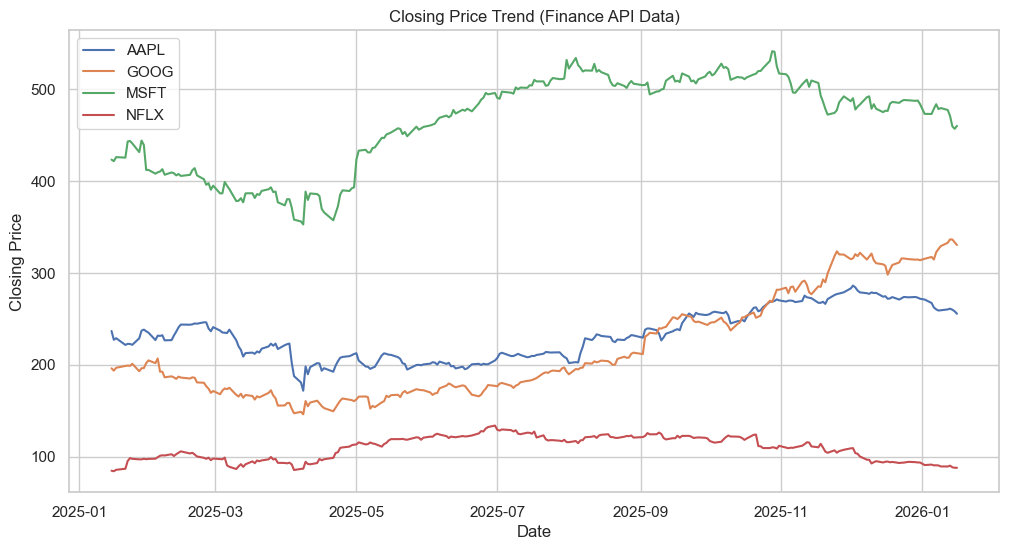

In [93]:
###Closing Price Trend
plt.figure(figsize=(12,6))

for ticker in clean_combined_df['Ticker'].unique():
    df = clean_combined_df[clean_combined_df['Ticker'] == ticker]
    plt.plot(df['Date'], df['Close'], label=ticker)

plt.title("Closing Price Trend (Finance API Data)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


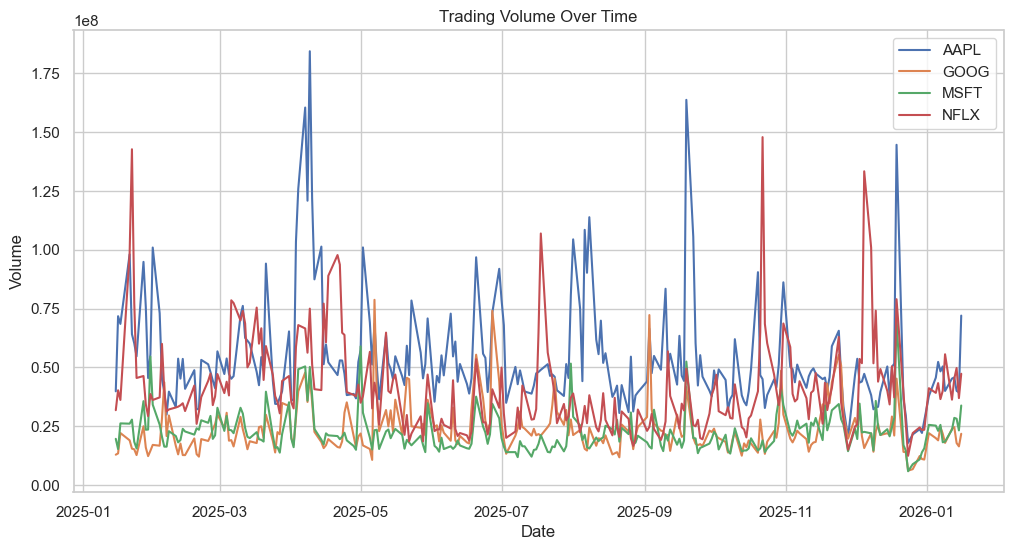

In [94]:
### Trading Volume Analysis
plt.figure(figsize=(12,6))

for ticker in clean_combined_df['Ticker'].unique():
    df = clean_combined_df[clean_combined_df['Ticker'] == ticker]
    plt.plot(df['Date'], df['Volume'], label=ticker)

plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


**Insight:**  
Spikes in trading volume often coincide with significant price
movements, indicating increased market activity.


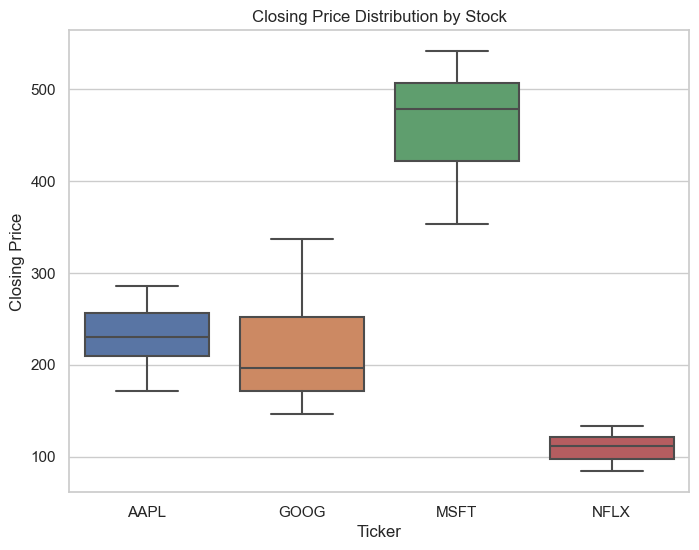

In [99]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Ticker', y='Close', data=clean_combined_df)
plt.title("Closing Price Distribution by Stock")
plt.xlabel("Ticker")
plt.ylabel("Closing Price")
plt.show()


### 7. Feature Engineering

In [102]:
# Daily returns
clean_combined_df['Daily_Return'] = (
    clean_combined_df
    .groupby('Ticker')['Close']
    .pct_change()
)

In [103]:
clean_combined_df[['Date', 'Ticker', 'Close', 'Daily_Return']].head()


Price,Date,Ticker,Close,Daily_Return
0,2025-01-15,AAPL,236.799011,NaN
1,2025-01-16,AAPL,227.232285,-0.040400
2,2025-01-17,AAPL,228.944534,0.007535
3,2025-01-21,AAPL,221.637573,-0.031916
4,2025-01-22,AAPL,222.822235,0.005345


**Insight:**  
Daily returns capture percentage price changes and allow performance comparison across stocks with different price levels.

In [105]:
##Moving Averages (20-day and 50-day moving averages.)
clean_combined_df['MA_20'] = (
    clean_combined_df
    .groupby('Ticker')['Close']
    .transform(lambda x: x.rolling(window=20).mean())
)

clean_combined_df['MA_50'] = (
    clean_combined_df
    .groupby('Ticker')['Close']
    .transform(lambda x: x.rolling(window=50).mean())
)


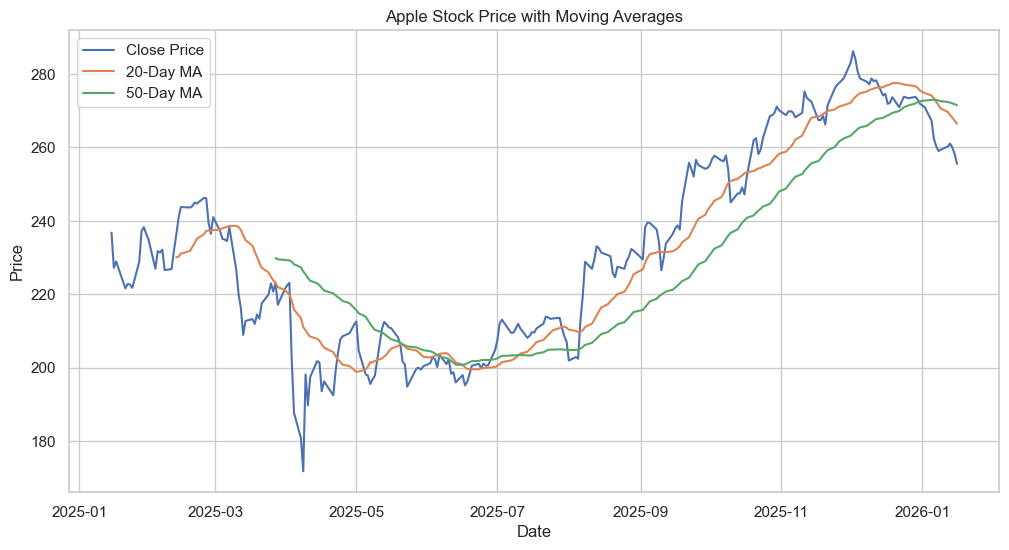

In [106]:
aapl_df = clean_combined_df[clean_combined_df['Ticker'] == 'AAPL']

plt.figure(figsize=(12,6))
plt.plot(aapl_df['Date'], aapl_df['Close'], label='Close Price')
plt.plot(aapl_df['Date'], aapl_df['MA_20'], label='20-Day MA')
plt.plot(aapl_df['Date'], aapl_df['MA_50'], label='50-Day MA')
plt.title("Apple Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


**Insight:**  
Moving averages smooth short-term fluctuations and help identify underlying price trends.


In [109]:
#Rolling Volatility (Risk Measure) (Volatility = rolling standard deviation of returns)
clean_combined_df['Volatility_20'] = (
    clean_combined_df
    .groupby('Ticker')['Daily_Return']
    .transform(lambda x: x.rolling(window=20).std())
)


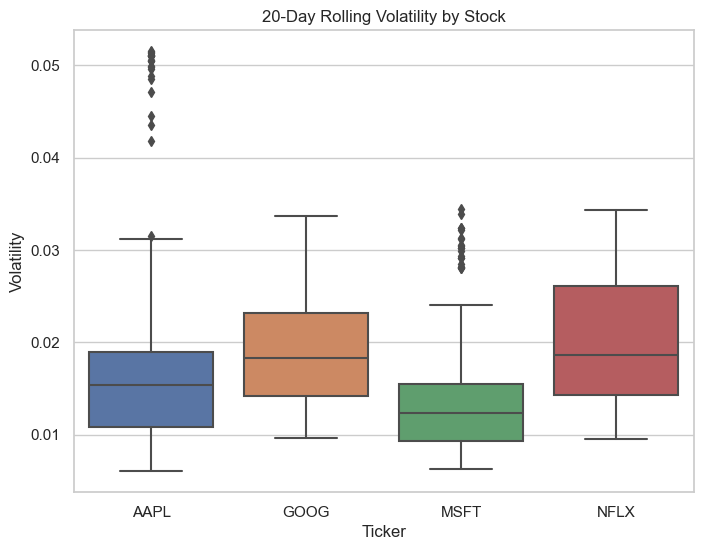

In [110]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Ticker', y='Volatility_20', data=clean_combined_df)
plt.title("20-Day Rolling Volatility by Stock")
plt.xlabel("Ticker")
plt.ylabel("Volatility")
plt.show()

**Insight:**  
Volatility analysis highlights differences in risk levelsacross stocks, which is critical for investment decisions.

In [111]:
clean_combined_df.info()
clean_combined_df.to_csv("data/stock_data_api.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1012 non-null   datetime64[ns]
 1   Close          1012 non-null   float64       
 2   High           1012 non-null   float64       
 3   Low            1012 non-null   float64       
 4   Open           1012 non-null   float64       
 5   Volume         1012 non-null   int64         
 6   Ticker         1012 non-null   object        
 7   Daily_Return   1008 non-null   float64       
 8   MA_20          936 non-null    float64       
 9   MA_50          816 non-null    float64       
 10  Volatility_20  932 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 94.9+ KB
